## レポート課題13

# 課題13.1
下記の常微分方程式の数値解をオイラー法と4次のルンゲクッタ法で計算し、厳密解と比較しなさい（3つの結果をグラフで表示すること）。

$$
\frac{d^2x}{dt^2}=-x
$$

$t$ の範囲は $t \in [0,20]$、初期条件を $[t_0, X_0, Y_0]=[0, 1, 0]$、分割数は $n=100$ とします。    


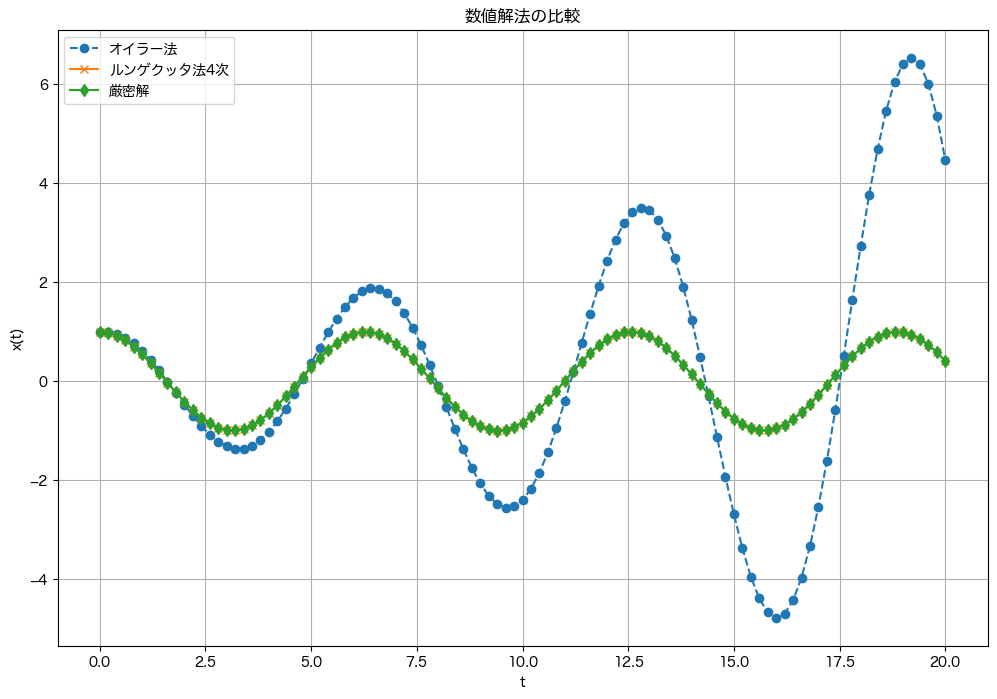

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語フォントを設定
rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

# パラメータの設定
t0 = 0
X0 = 1
Y0 = 0
t_end = 20
n = 100
h = (t_end - t0) / n

# 初期化
t_values = np.linspace(t0, t_end, n+1)
x_euler = np.zeros(n+1)
y_euler = np.zeros(n+1)
x_rk4 = np.zeros(n+1)
y_rk4 = np.zeros(n+1)
x_exact = np.zeros(n+1)
y_exact = np.zeros(n+1)

# 初期条件の設定
x_euler[0] = X0
y_euler[0] = Y0
x_rk4[0] = X0
y_rk4[0] = Y0

# オイラー法による数値解
for i in range(n):
    x_euler[i+1] = x_euler[i] + h * y_euler[i]
    y_euler[i+1] = y_euler[i] - h * x_euler[i]

# 4次のルンゲクッタ法による数値解
for i in range(n):
    k1x = h * y_rk4[i]
    k1y = h * (-x_rk4[i])
    k2x = h * (y_rk4[i] + 0.5 * k1y)
    k2y = h * (-(x_rk4[i] + 0.5 * k1x))
    k3x = h * (y_rk4[i] + 0.5 * k2y)
    k3y = h * (-(x_rk4[i] + 0.5 * k2x))
    k4x = h * (y_rk4[i] + k3y)
    k4y = h * (-(x_rk4[i] + k3x))
    x_rk4[i+1] = x_rk4[i] + (k1x + 2*k2x + 2*k3x + k4x) / 6
    y_rk4[i+1] = y_rk4[i] + (k1y + 2*k2y + 2*k3y + k4y) / 6

# 厳密解の計算
x_exact = np.cos(t_values)
y_exact = -np.sin(t_values)

# グラフの描画
plt.figure(figsize=(12, 8))
plt.plot(t_values, x_euler, label='オイラー法', linestyle='--', marker='o')
plt.plot(t_values, x_rk4, label='ルンゲクッタ法4次', linestyle='-', marker='x')
plt.plot(t_values, x_exact, label='厳密解', linestyle='-', marker='d')
plt.title('数値解法の比較')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()


## 課題13.2

$y$ を $x$ の関数とする次の常微分方程式
$$
\frac{d y}{d x}=(1+x)y, \:\: y(0)=\sqrt{e}
$$

の $x=1$ における解の値 $y(1)$ をルンゲ-クッタ法を用いて求めよ．その際に，$x$ 軸方向の刻み幅の分割数 $n$ を変えたときの誤差評価を行い，その一連の結果を課題12.2で作成した図に加筆して提出せよ．

課題12.2 参考図：

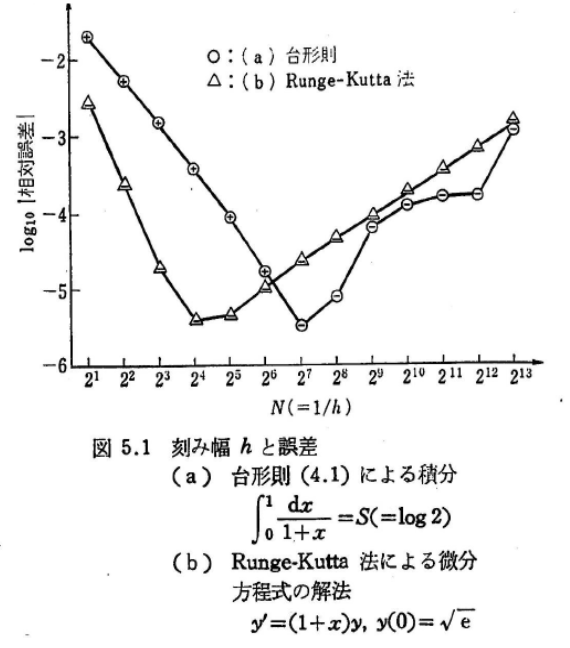
(出所：伊理・藤野，数値計算の常識，共立出版，1985.)

n = 10: y(1) ≈ 7.388998715392384, 誤差 = 5.7383538265121103e-05
n = 20: y(1) ≈ 7.389052289213421, 誤差 = 3.8097172287976377e-06
n = 50: y(1) ≈ 7.389055997873839, 誤差 = 1.0105681091943097e-07
n = 100: y(1) ≈ 7.3890560925401445, 誤差 = 6.39050501405336e-09
n = 200: y(1) ≈ 7.389056098528906, 誤差 = 4.0174352733401975e-10
n = 500: y(1) ≈ 7.38905609892033, 誤差 = 1.0319745058495755e-11
n = 1000: y(1) ≈ 7.389056098929991, 誤差 = 6.581402089977928e-13


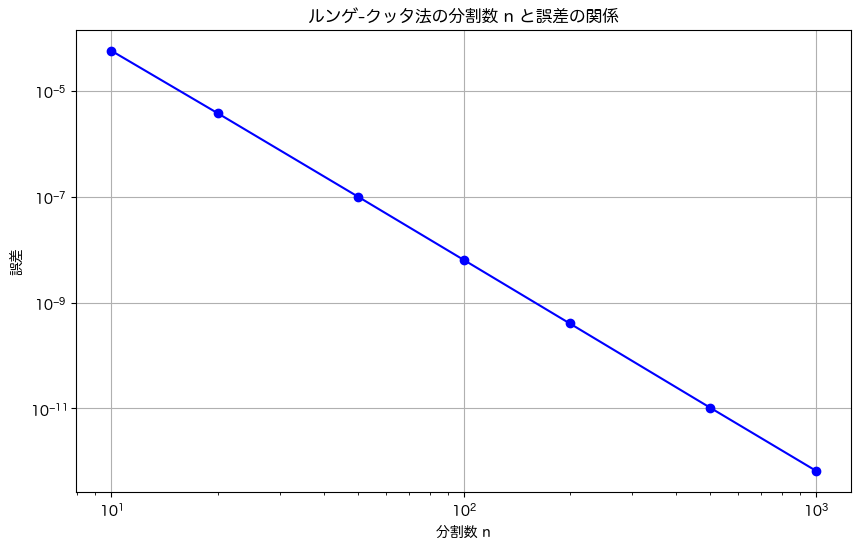

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語フォントを設定
rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

# 与えられた微分方程式 dy/dx = (1+x)y
def dydx(x, y):
    return (1 + x) * y

# 初期条件
x0 = 0
y0 = np.sqrt(np.e)
x_end = 1

# ルンゲ-クッタ法による解の計算
def runge_kutta(x0, y0, x_end, n):
    h = (x_end - x0) / n
    x = x0
    y = y0
    for i in range(n):
        k1 = h * dydx(x, y)
        k2 = h * dydx(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x + h, y + k3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x += h
    return y

# 理論解を計算
def exact_solution(x):
    return np.sqrt(np.e) * np.exp(x + 0.5 * x**2)

# 分割数 n のリスト
n_values = [10, 20, 50, 100, 200, 500, 1000]

# 誤差評価
errors = []

for n in n_values:
    y_rk = runge_kutta(x0, y0, x_end, n)
    y_exact = exact_solution(x_end)
    error = abs(y_rk - y_exact)
    errors.append(error)
    print(f"n = {n}: y(1) ≈ {y_rk}, 誤差 = {error}")

# 誤差のプロット
plt.figure(figsize=(10, 6))
plt.loglog(n_values, errors, marker='o', linestyle='-', color='b')
plt.xlabel('分割数 n')
plt.ylabel('誤差')
plt.title('ルンゲ-クッタ法の分割数 n と誤差の関係')
plt.grid(True)
plt.show()


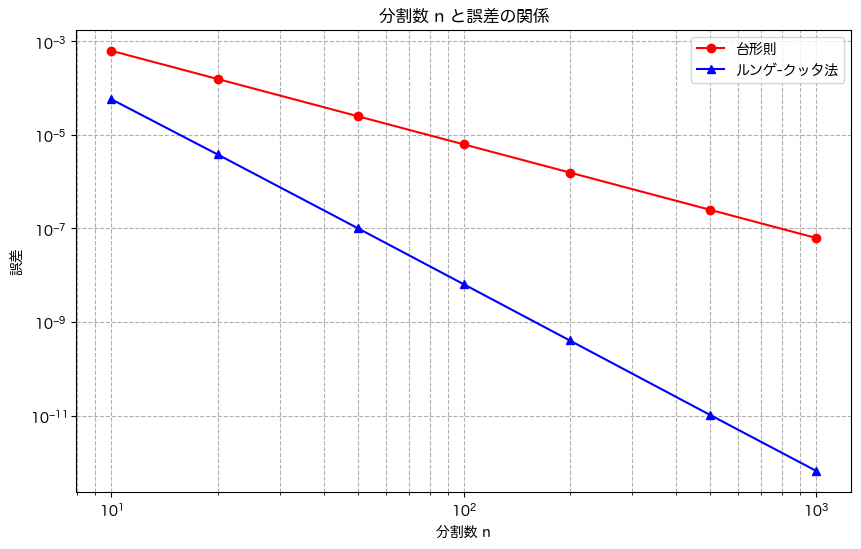

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語フォントを設定
rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

# 与えられた微分方程式 dy/dx = (1+x)y
def dydx(x, y):
    return (1 + x) * y

# 初期条件
x0 = 0
y0 = np.sqrt(np.e)
x_end = 1

# ルンゲ-クッタ法による解の計算
def runge_kutta(x0, y0, x_end, n):
    h = (x_end - x0) / n
    x = x0
    y = y0
    for i in range(n):
        k1 = h * dydx(x, y)
        k2 = h * dydx(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x + h, y + k3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x += h
    return y

# 台形法による積分の誤差計算
def trapezoidal_rule(n):
    h = 1 / n
    integral = 0.5 * (1 / (1 + 0) + 1 / (1 + 1))
    for k in range(1, n):
        integral += 1 / (1 + k * h)
    integral *= h
    return integral

# 理論解を計算
def exact_solution(x):
    return np.sqrt(np.e) * np.exp(x + 0.5 * x**2)

# 分割数 n のリスト
n_values = [10, 20, 50, 100, 200, 500, 1000]

# 誤差評価
errors_rk = []
errors_trap = []

for n in n_values:
    y_rk = runge_kutta(x0, y0, x_end, n)
    y_exact = exact_solution(x_end)
    
    error_rk = abs(y_rk - y_exact)
    errors_rk.append(error_rk)
    
    integral_trap = trapezoidal_rule(n)
    error_trap = abs(integral_trap - np.log(2))
    errors_trap.append(error_trap)

# 誤差のプロット
plt.figure(figsize=(10, 6))
plt.loglog(n_values, errors_trap, marker='o', linestyle='-', color='r', label='台形則')
plt.loglog(n_values, errors_rk, marker='^', linestyle='-', color='b', label='ルンゲ-クッタ法')
plt.xlabel('分割数 n')
plt.ylabel('誤差')
plt.title('分割数 n と誤差の関係')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


##########################################################################################

レポート課題に取り組み，プログラムと結果を.ipynb形式のファイルに保存してCoursePowerから提出しなさい． 

提出ファイル名：CBReport13_学籍番号_英字氏名.ipynb

 例えば，学籍番号12345678の青山太郎の場合は，CBReport13_12345678_AoyamaTaro.ipynb　というファイル名で提出する．
